In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import time
import math
from IPython.display import Markdown, display
from sklearn.metrics import pairwise


%matplotlib inline


def printmd(string):
    display(Markdown(string))

In [2]:
# Import data
wine = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


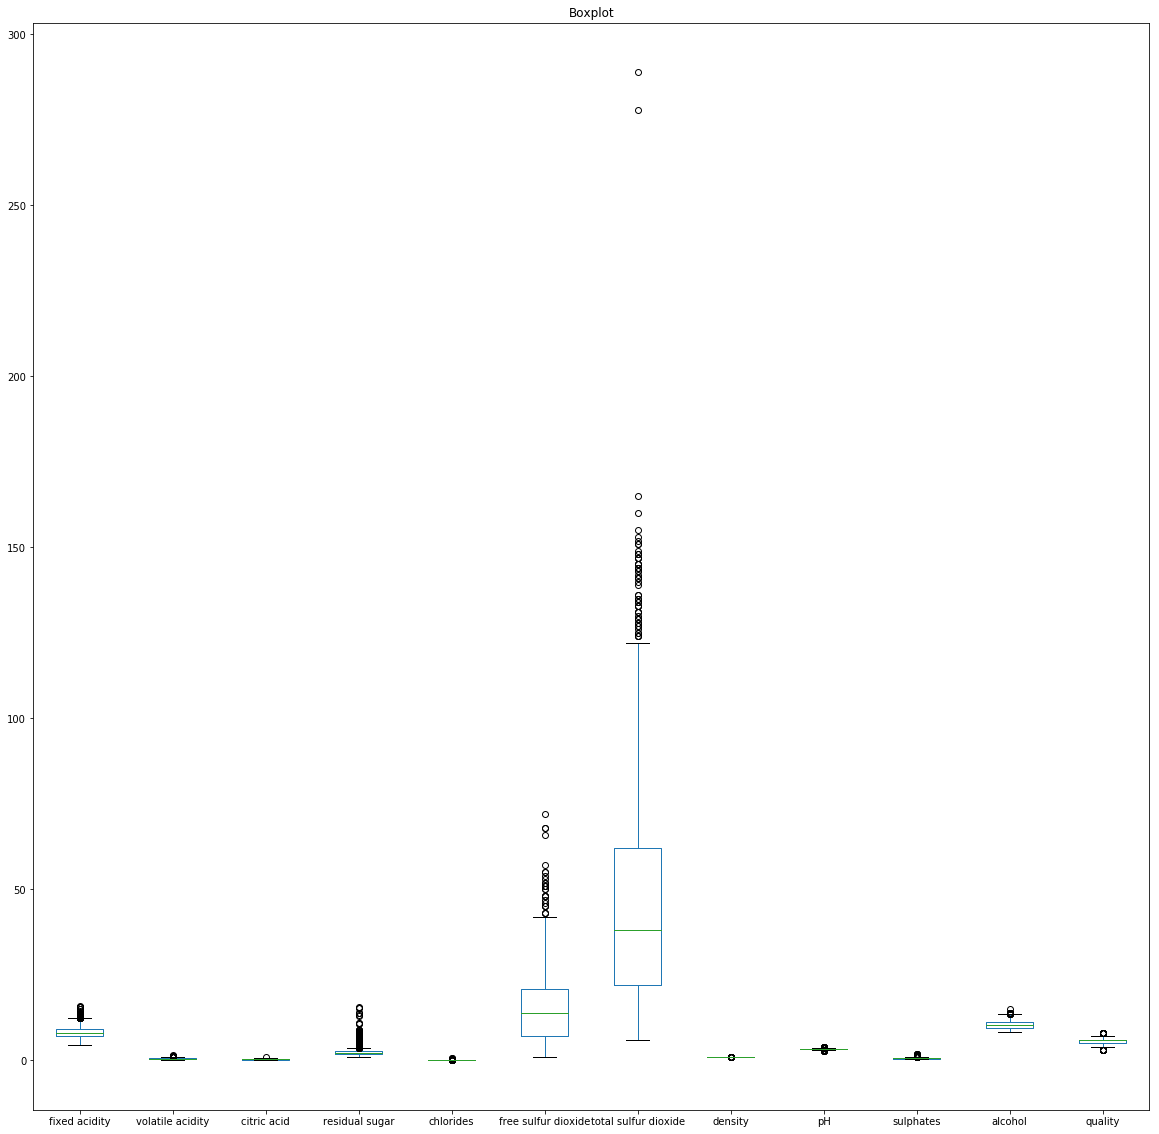

In [5]:
wine.plot(kind = 'box', figsize = (20,20), title = 'Boxplot')

In [6]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


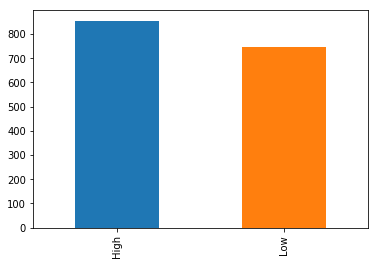

In [8]:
wine['class'] = ['Low' if i <= 5 else "High" for i in wine.quality]
wine['class'].value_counts().plot(kind = 'bar')

In [9]:
# Dropping quality attribute
wine.drop(columns = ['quality'], inplace = True)

wine_data = wine[wine.columns[wine.columns != 'class']]
wine_label = wine[wine.columns[wine.columns == 'class']]

In [10]:
# Z score normalization
df1 = (wine_data - wine_data.mean())/wine_data.std()

# Min max normalization
df2 = (wine_data-wine_data.min())/(wine_data.max()-wine_data.min())

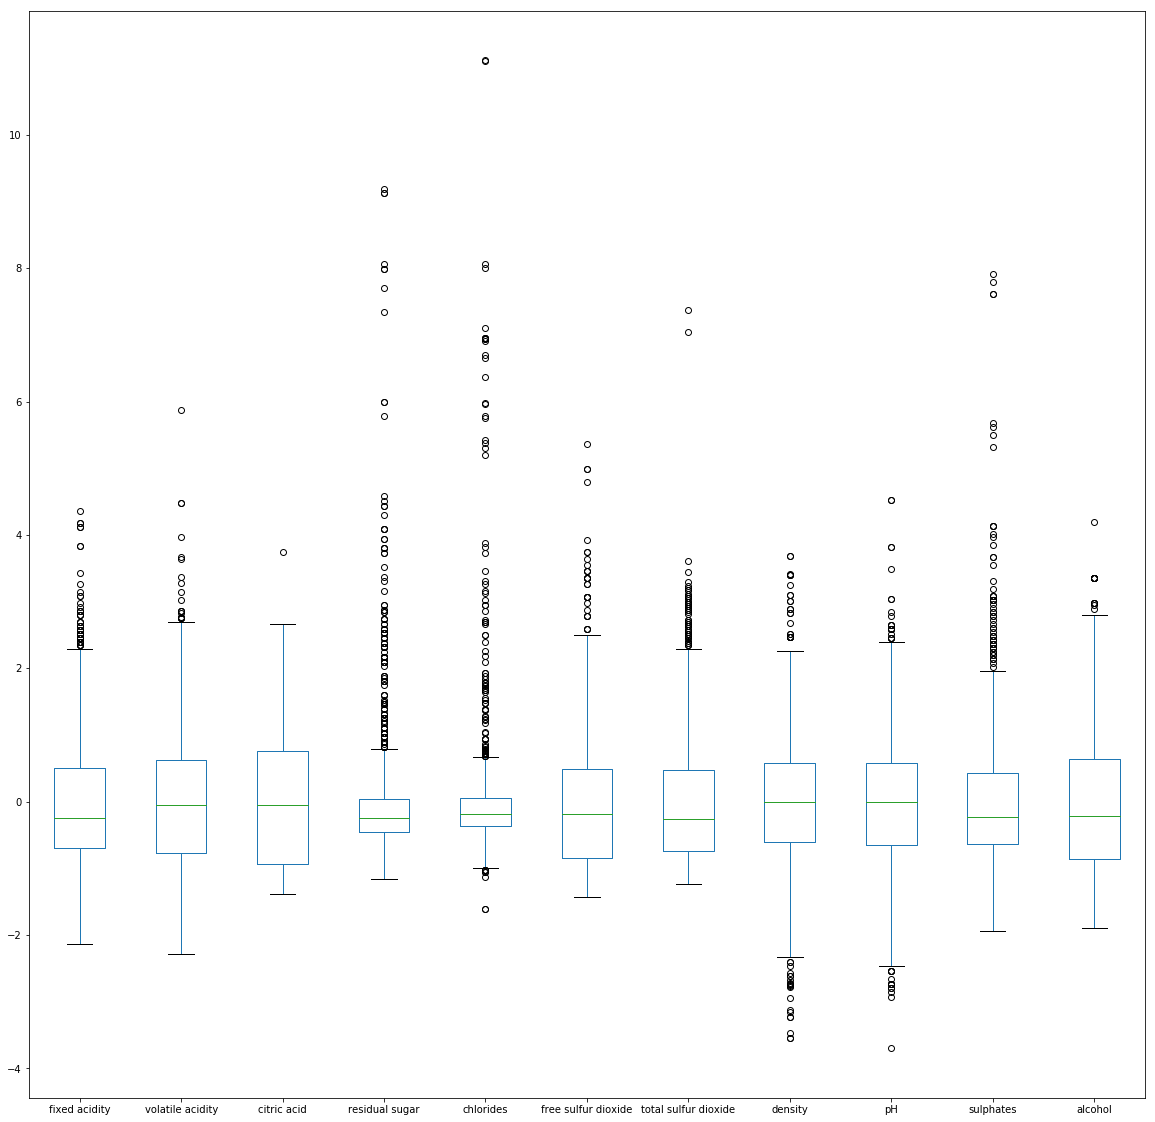

In [11]:
df1.plot(kind ='box', figsize = (20,20))

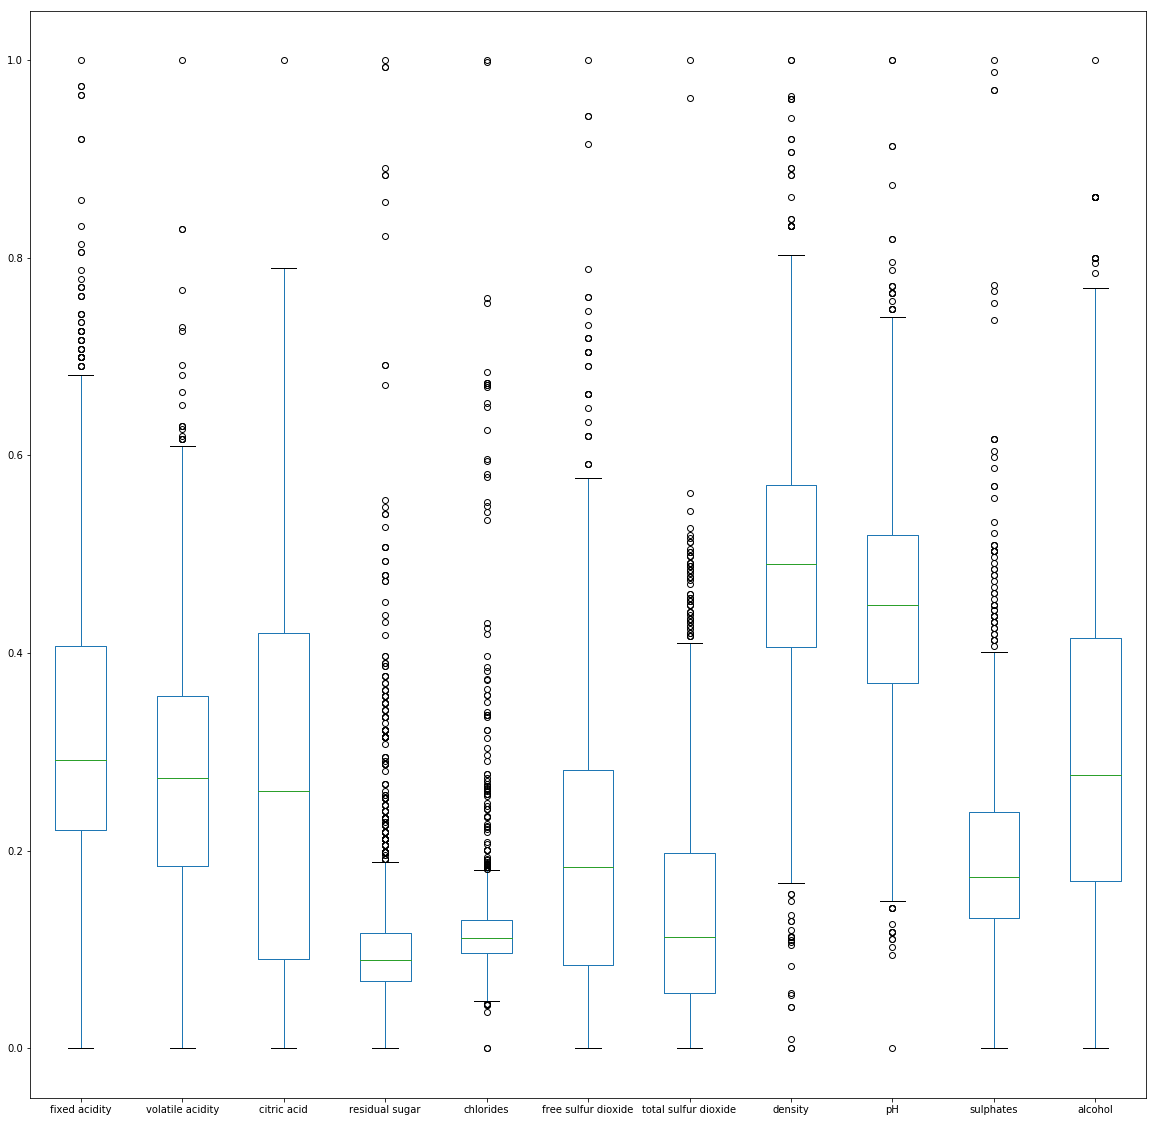

In [12]:
df2.plot(kind ='box', figsize = (20,20))

In [25]:
def euclidean_dist(x,y):
    return (math.sqrt(sum((pd.Series(x)-pd.Series(y))**2)))

#pairwise.paired_distances([x],[y], metric='euclidean')[0]

    
    
def KNN(k, train_df, train_labels, test_df):
    out = []
    test_nums = test_df.shape[0]
    for i in range(test_nums):
        distances = train_data.apply(lambda x: euclidean_dist(x,test_df.iloc[i,:]), axis=1)
        distances_sorted = distances.sort_values().index
        distances_class = train_labels.loc[distances_sorted]['class']
        distances_class = distances_class[:k+1]
        res = distances_class.value_counts().index[0]
        out.append(res)
    return pd.Series(out)
        
def OptimalKFinder(k_max, train_df, train_labels, test_df, test_label):
    out = {}
    for i in range(1,k_max+1):
        x = KNN(i,train_df, train_labels, test_df)
        TP, FN, FP, TN, accuracy, precision, recall = confusion(x,test_label)
        out['TP'] = out.get('TP',[]) + [TP]
        out['FN'] = out.get('FN',[]) + [FN]
        out['FP'] = out.get('FP',[]) + [FP]
        out['TN'] = out.get('TN',[]) + [TN]
        out['accuracy'] = out.get('accuracy',[]) + [accuracy]
        out['precision'] = out.get('precision',[]) + [precision]
        out['recall'] = out.get('recall',[]) + [recall]
    return pd.DataFrame(out)
        
def confusion(x,y):
    if len(x) != len(y):
        return 'Length do not match'
    y = list(y)
    TP, TN, FP, FN = 0,0,0,0
    for i in range(len(x)):

        if y[i] == 'High':
            if x[i] == 'High':
                TP += 1
            else:
                FN += 1
        else:
            if x[i] == 'High':
                FP += 1
            else:
                TN += 1
    accuracy = ((TP+TN)*100)/(TP+FN+FP+TN)
    precision = (TP*100)/(TP+FP)
    recall = (TP*100)/(TP+FN)
    return TP, FN, FP, TN, accuracy, precision, recall

        
def confusion_d(x,y):
    if len(x) != len(y):
        return 'Length do not match'
    y = list(y)
    TP, TN, FP, FN = 0,0,0,0
    for i in range(len(x)):

        if y[i] == 'High':
            if x[i] == 'High':
                TP += 1
            else:
                FN += 1
        else:
            if x[i] == 'High':
                FP += 1
            else:
                TN += 1
    accuracy = ((TP+TN)*100)/(TP+FN+FP+TN)
    precision = (TP*100)/(TP+FP)
    recall = (TP*100)/(TP+FN)
    printmd(f'<table> \
            <tr> \
                <th rowspan=\'2\' colspan=\'2\'>Confusion Matrix<th> \
                <th colspan=\'2\'><center>Predicted Values</center></th> \
            </tr> \
            <tr> \
                <td>High</td> \
                <td>Low</td> \
            </tr> \
            <tr> \
                <th rowspan=\'2\'>Actual Values</th> \
                <td>High</td> \
                <td>{TP}</td> \
                <td>{FN}</td> \
            </tr> \
            <tr> \
                <td>Low</td> \
                <td>{FP}</td> \
                <td>{TN}</td> \
            </tr> \
        </table>')
    
    return TP, FN, FP, TN, accuracy, precision, recall
                

        

In [18]:
train_data, test_data, train_label, test_label = train_test_split(wine_data, wine_label, train_size = 0.9, test_size = 0.1) 
# Running KNN
start_time = time.time()
x = KNN(1, train_data, train_label, test_data)
print("--- %s seconds ---" % (time.time() - start_time))
print(x.value_counts())
TP, FN, FP, TN, accuracy, precision, recall = confusion(x,test_label['class'])
print(accuracy, precision, recall)

--- 71.89775276184082 seconds ---
Low     89
High    71
dtype: int64


<table>             <tr>                 <th rowspan='2' colspan='2'>Confusion Matrix<th>                 <th colspan='2'><center>Predicted Values</center></th>             </tr>             <tr>                 <td>High</td>                 <td>Low</td>             </tr>             <tr>                 <th rowspan='2'>Actual Values</th>                 <td>High</td>                 <td>48</td>                 <td>41</td>             </tr>             <tr>                 <td>Low</td>                 <td>23</td>                 <td>48</td>             </tr>         </table>

60.0 67.6056338028169 53.93258426966292


In [19]:
# Running KNN with min-max normalized data

train_data, test_data, train_label, test_label = train_test_split(df1, wine_label, train_size = 0.9, test_size = 0.1) 

start_time = time.time()
x = KNN(1, train_data, train_label, test_data)
print("--- %s seconds ---" % (time.time() - start_time))
print(x.value_counts())
TP, FN, FP, TN, accuracy, precision, recall = confusion(x,test_label['class'])
print(accuracy, precision, recall)

--- 71.148677110672 seconds ---
Low     95
High    65
dtype: int64


<table>             <tr>                 <th rowspan='2' colspan='2'>Confusion Matrix<th>                 <th colspan='2'><center>Predicted Values</center></th>             </tr>             <tr>                 <td>High</td>                 <td>Low</td>             </tr>             <tr>                 <th rowspan='2'>Actual Values</th>                 <td>High</td>                 <td>53</td>                 <td>35</td>             </tr>             <tr>                 <td>Low</td>                 <td>12</td>                 <td>60</td>             </tr>         </table>

70.625 81.53846153846153 60.22727272727273


In [20]:
# Running KNN with min-max normalized data

train_data, test_data, train_label, test_label = train_test_split(df2, wine_label, train_size = 0.9, test_size = 0.1) 

start_time = time.time()
x = KNN(1, train_data, train_label, test_data)
print("--- %s seconds ---" % (time.time() - start_time))
print(x.value_counts())
TP, FN, FP, TN, accuracy, precision, recall = confusion(x,test_label['class'])
print(accuracy, precision, recall)

--- 69.55389404296875 seconds ---
Low     99
High    61
dtype: int64


<table>             <tr>                 <th rowspan='2' colspan='2'>Confusion Matrix<th>                 <th colspan='2'><center>Predicted Values</center></th>             </tr>             <tr>                 <td>High</td>                 <td>Low</td>             </tr>             <tr>                 <th rowspan='2'>Actual Values</th>                 <td>High</td>                 <td>51</td>                 <td>41</td>             </tr>             <tr>                 <td>Low</td>                 <td>10</td>                 <td>58</td>             </tr>         </table>

68.125 83.60655737704919 55.43478260869565


In [22]:
printmd('# Comparing with off the shelf KNN classifiers')
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_label['class']) 
KNeighborsClassifier(algorithm='auto',  metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
x = knn.predict(test_data)
TP, FN, FP, TN, accuracy, precision, recall = confusion(x,test_label['class'])
accuracy, precision, recall

# Comparing with off the shelf KNN classifiers

(74.375, 77.41935483870968, 78.26086956521739)

In [23]:
# Varying K
x = OptimalKFinder(10, train_data, train_label, test_data, test_label['class'])

In [26]:
x

,FN,FP,TN,TP,accuracy,precision,recall
0,22,17,51,70,75.625,80.459770,76.086957
1,41,10,58,51,68.125,83.606557,55.434783
2,25,21,47,67,71.250,76.136364,72.826087
3,32,12,56,60,72.500,83.333333,65.217391
4,20,21,47,72,74.375,77.419355,78.260870
5,32,17,51,60,69.375,77.922078,65.217391
6,26,20,48,66,71.250,76.744186,71.739130
7,33,13,55,59,71.250,81.944444,64.130435
8,23,17,51,69,75.000,80.232558,75.000000
9,30,14,54,62,72.500,81.578947,67.391304


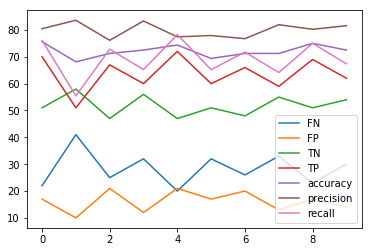

In [27]:
x.plot()